# Projet - Message cachés
Le but de ce projet est de transmettre un message chiffré et caché dans une image toute banale.

## Partie A : Stéganographie
Nous allons faire apparaître de l'espace mémoire dans une image sans que personne ne s'en rend compte !

### Première étape : 
**Bits de poids fort, bits de poids faible**

Petit rappel sur le codage binaire.<br />
Un nombre entier entre 0 et 255 peut-être codé à l’aide d’un octet sous la forme d’une suite de 0 et/ou de 1. Chacun de ses 0 ou 1 correspond à une puissance de 2. Soit on la prend (1) soit on la laisse (0).
Par exemple avec le nombre 204 :<br />

|Les puissances| $2^7$| $2^6$| $2^5$ | $2^4$ | $2^3$ | $2^2$ | $2^1$ | $2^0$|
|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|Les bits|1|1|0|0|1|1|0|0|

$1\times 2^7 + 1\times 2^6 + 1\times 2^3 + 1\times 2^2 = 128 + 64 + 8 + 4 = 204$ <br />

`1100 1100` vaut donc 204. <br />
Plus un bit est à gauche, plus il correspond à un grand nombre (128, 64, ...), on les appelle les bits de **poids fort**. <br />
Plus un bit est à droite, plus il correspond à un petit nombre (4, 2, 1, ...), on les appelle les bits de **poids faible**. <br />
Si lors d’un codage ou d’une transmission, on fait une erreur sur un bit de poids faible, cette erreur ne sera pas trop importante. <br />
Ainsi, si j’écris `1100 1000` (un bit erroné), mon résultat est de 200. Ce qui est assez proche de 204.<br />
Par contre, si j’écris `1000 1100` (un autre bit erroné), mon résultat est de 140 qui est très éloigné de 204.<br />

Le principe de la stéganographie numérique est de dire que les bits de poids faible sont sans importance. On peut
les enlever. En effet, si je décide de supprimer les 3 bits de poids faible correspondants aux puissances $2^2$ , $2^1$ et $2^0$ je vais commettre au maximum une erreur de $2^2 + 2^1 + 2^0 = 7$. <br />

J’obtiens alors 3 bits libres dans lesquels je vais pouvoir dissimuler mon message !<br /><br /><br />

**Un masque**

Nous avons déjà vu dans les opérateurs binaires, si, si ! Rappelez-vous ! <br />
Ce sont les portes `AND`, `OR`, `XOR`, `NOT`, ... <br />
En utilisant une de ses portes nous allons pouvoir créer ce qu'on appelle un masque, qui nous permettra d'effacer les bits de poids faibles sans trop d'efforts. <br />
Voici quelques tables de vérité pour mémoire :

|AND|0|1|
|:--|:--|:--|
|0|0|0|
|1|0|1|

|OR|0|1|
|:--|:--|:--|
|0|0|1|
|1|1|1|

|XOR|0|1|
|:--|:--|:--|
|0|0|1|
|1|1|0|

|NOT|0|1|
|:--|:--|:--|
||1|0|

***Exercice 1 :***
Quel est le résultat de `12 AND 7` ? <br />
"*Facile*", il suffit de de convertir les nombres en binaires et d'effectuer bit par bit l'opération `AND`. <br />
Autrement dit : <br />

||12| vaut| 1100|
|-|-|-|-|
||7 |vaut |0111|
|AND|||0100|

Donc `12 AND 7` vaut `4` !

On peut le vérifier avec un petit code Python puisque le `AND` binaire s'écrit `&`.

In [5]:
12 & 7

4

***Exercice 2 :*** 
Si je veux effectuer un masque sur les 3 premiers bits de poids faibles sur le nombre 12, quel opérateur dois-je utiliser ? <br />
"*Facile à nouveau*", c'est `12 AND NOT 7`.... :-( <br />
Oui, bon, j'avoue ce n'était pas si évident. Voyons plutôt : <br />

||12| vaut| 1100|
|-|-|-|-|
|| NOT 7 |vaut |1000|
|AND|||1000|

J'ai donc bien réussi à faire "disparaître" les 3 premiers bits de poids faibles de mon nombre 12.

Vérifions avec un code Python (en binaire le `NOT` s'écrit `~`).

In [2]:
12 & ~ 7

8

***Exercice 3:*** Écrire une fonction `masque(nb,bt)` qui prend en arguments deux entiers `nb` et `bt`.<br />
* `nb` est un entier entre 0 et 255.
* `bt` est entier entre 0 et 8.
La fonction transforme le nombre `nb` en remplaçant ses `bt` bits de poids faible par des 0.

In [ ]:
def masque(nb, bt):
    '''
    Entrées :
    nb est un nombre entier entre 0 et 255
    bt est un nombre entier entre 0 et 8
    Sortie :
    un nb entier
    Rôle :
    on supprime les bt bits de poids faible à l’aide d’un masque
    '''
    pass

In [ ]:
# on teste la fonction
masque(12,3) # doit renvoyer 8

In [ ]:
# on teste à nouveau la fonction
masque(204,3) # doit renvoyer 200

<br /><br /><br /><br /><br /><br /><br /><br />

**Des images**
Nous allons maintenant travailler sur des images

Pour commencer, nous devons télécharger un module spécifique, le module `Pillow`

In [1]:
import sys
!{sys.executable} -m pip install pillow

     |████████████████████████████████| 3.0 MB 4.4 MB/s eta 0:00:01


Nous pouvons alors importer le module dans notre notebook et travailler avec son sous module `Image`.

In [3]:
from PIL import Image

Nous avons maintenant accès à toute une série de méthode qui nous permettent de travailler sur des images. <br />
Voici quelques exemples :

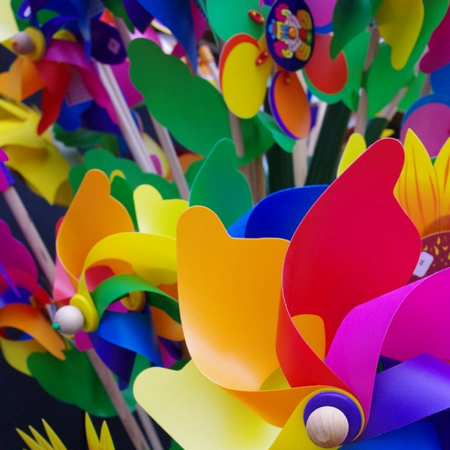

Nombre de pixels en largeur : 450
Nombre de pixels en hauteur : 450
La composante de rouge est du pixel (50,150):	 121
La composante de vert est du pixel (50,150):	 117
La composante de bleu est du pixel (50,150):	 7


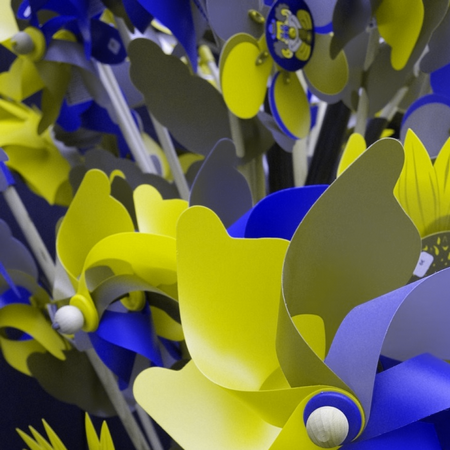

In [9]:
# pour charger une image
img = Image.open('couleurs.bmp')
# pour afficher l'image dans le notebook
display(img)
# pour afficher l'image dans un IDE (comme Pyzo)
# img.show()

# pour récupérer les dimensions de l'image
largeur, hauteur = img.size
print('Nombre de pixels en largeur :', largeur)
print('Nombre de pixels en hauteur :', hauteur)

# pour récupérer les composantes Rouge, Vert et Bleu d'un pixel (là ,j'ai pris le pixel de coordonnées (50, 150))
R, V, B = img.getpixel((50, 150))
print('La composante de rouge est du pixel (50,150):\t', R)
print('La composante de vert est du pixel (50,150):\t', V)
print('La composante de bleu est du pixel (50,150):\t', B)

# pour modifier la composante Rouge, Vert et Bleu d'un pixel
# img.putpixel((x, y),(R, V, B))

# pour modifier tous les pixels d'une image
# par exemple ici pour simuler la vision d'un daltonien
for x in range(largeur):
    for y in range(hauteur):
        # on prend la couleur
        R, V, B = img.getpixel((x, y))
        moyenneRV = (R+V)//2
        # on modifie la conleur
        img.putpixel((x, y),(moyenneRV, moyenneRV, B))

# pour sauvegarder l'image modifiée
img.save("nouvelle_image.jpg")
# et afficher le nouveau résultat
display(img)

# on ferme le fichier proprement
img.close()

***Exercice 4:*** Ecrire une fonction `image_faible(nom,bt)` qui prend en argument `nom` le nom de l'image complet (avec son extension) et `bt` un entier entre 0 et 8 qui correspond au nombre de bits de poids faibles que nous allons annuler sur chaque composante de rouge, vert et bleu.

In [ ]:
def image_faible(nom,bt, verbose=False):
    '''
    Entrées :
    nom est de type string, c'est le nom de l'image avec son extension
    bt est un nombre entier entre 0 et 8
    verbose est un booléen qui par défaut faux False. S'il est vrai, la fonction commentera ses résultats
    Sortie :
    aucune
    Rôle : 
    on supprime les bt bits de poids faible de chaque composante rouge, vert, bleu de chaque pixel
    '''
    photo = Image.open(nom)
    largeur , hauteur = photo.size
    for x in range(largeur):
        for y in range(hauteur):
            rouge , vert , bleu = photo.getpixel((x,y))
            # on supprime les bits de poids faible
            pass
        
            # on réinjecte la nouvelle composante
            photo.putpixel((x,y),(rouge,vert,bleu))
    # un peu de commentaire
    if verbose == True :
        print('On a annulé',bt,'bits de poids faible')
    # on sauvegarde le résultat
    photo.save('poids_faible'+str(bt)+'.bmp')
    # on affiche le résultat
    # photo.show()
    # on ferme fichier
    photo.close()

Maintenant que nous avons cette fonction, nous allons pouvoir tester pour chaque valeur de `bt`l'impact sur la qualité de l'image.

In [ ]:
for bt in range(0,9):
    image_faible('cache-cache.bmp',bt, True)

Au regard de ces résultats, quelle est la valeur de `bt` optimale ?

***Question subsidaire***